In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train=pd.read_csv("./train.csv")

In [3]:
test=pd.read_csv("./test.csv")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

In [6]:
missing(train)

id_24             99.20
id_25             99.13
id_26             99.13
id_21             99.13
id_22             99.13
id_23             99.13
id_08             99.13
id_07             99.13
id_27             99.13
dist2             93.64
D7                93.43
id_18             92.37
D13               89.55
D14               89.49
D12               89.08
id_03             88.78
id_04             88.78
D6                87.65
id_33             87.61
id_09             87.32
id_10             87.32
D8                87.32
D9                87.32
id_32             86.88
id_30             86.88
id_34             86.84
id_14             86.46
V158              86.14
V157              86.14
V159              86.14
V160              86.14
V156              86.14
V155              86.14
V154              86.14
V153              86.14
V143              86.14
V152              86.14
V151              86.14
V150              86.14
V149              86.14
V148              86.14
V147            

In [7]:
missing(test)

id_24             99.19
id_25             99.13
id_23             99.12
id_26             99.12
id_08             99.12
id_21             99.12
id_22             99.12
id_07             99.12
id_27             99.12
dist2             93.59
D7                93.34
id_18             92.33
D14               89.42
D13               89.40
D12               88.93
id_04             88.74
id_03             88.74
id_33             87.51
D6                87.48
D9                87.29
D8                87.29
id_10             87.29
id_09             87.29
id_30             86.81
id_32             86.81
id_34             86.77
id_14             86.41
V160              86.08
V159              86.08
V158              86.08
V157              86.08
V156              86.08
V155              86.08
V154              86.08
V153              86.08
V143              86.08
V152              86.08
V151              86.08
V150              86.08
V149              86.08
V148              86.08
V147            

**        **Missing values removal(threshold-50%)****

In [8]:
limitPer = len(train) * .50
train.dropna(thresh=limitPer, axis=1,inplace=True)
limitPer1 = len(test) * .50
test.dropna(thresh=limitPer1, axis=1,inplace=True)

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
n = train.nunique(axis=0)
n

TransactionID     442905
isFraud                2
TransactionDT     433291
TransactionAmt     17988
ProductCD              5
card1              12559
card2                500
card3                110
card4                  4
card5                115
card6                  4
addr1                300
addr2                 69
P_emaildomain         59
C1                  1412
C2                  1112
C3                    25
C4                  1056
C5                   318
C6                  1157
C7                   883
C8                  1048
C9                   203
C10                 1039
C11                 1267
C12                  971
C13                 1476
C14                 1001
D1                   641
D2                   641
D3                   640
D4                   794
D10                  810
D11                  674
D15                  847
M1                     2
M2                     2
M3                     2
M4                     3
M6                     2


In [12]:
ntest = test.nunique(axis=0)
ntest

TransactionID     147635
TransactionDT     146532
TransactionAmt      9646
ProductCD              5
card1               8891
card2                500
card3                 91
card4                  4
card5                 95
card6                  4
addr1                196
addr2                 49
P_emaildomain         59
C1                   761
C2                   697
C3                    11
C4                   518
C5                   291
C6                   638
C7                   406
C8                   514
C9                   192
C10                  532
C11                  665
C12                  465
C13                 1070
C14                  584
D1                   641
D2                   641
D3                   583
D4                   721
D10                  738
D11                  667
D15                  769
M1                     2
M2                     2
M3                     2
M4                     3
M6                     2
V1                     2


,0,1
isFraud,0.965011,0.034989


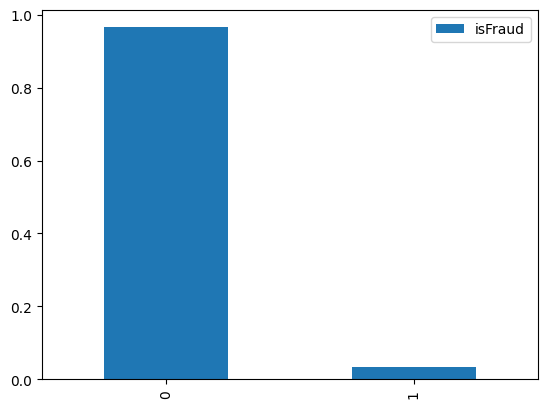

In [13]:
wt=train["isFraud"].value_counts(normalize=True).to_frame()
wt.plot.bar()
wt.T

In [14]:

cat_features = ['ProductCD', 'card1','card2','card3','card4','card5','card6', 'addr1','addr2', 'P_emaildomain',
                'M1', 'M2', 'M3', 'M4', 'M6']

num_features = [x for x in train.columns.values[2:] if x not in cat_features]

In [15]:
print('Categorical features :', len(cat_features))
print('Numerical features : ',len(num_features))

Categorical features : 15
Numerical features :  203


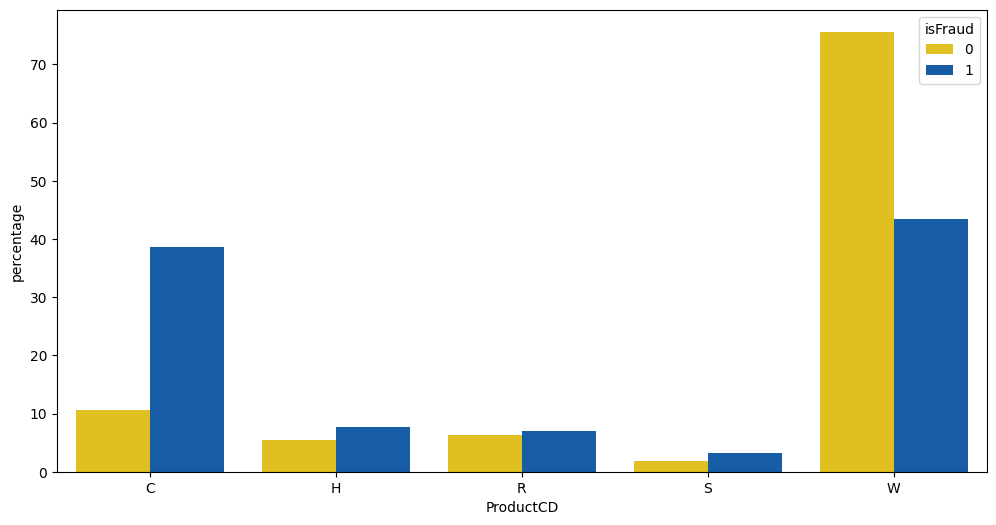

In [16]:
plt.figure(figsize=(12,6))
train_ProductCD = (train.groupby(['isFraud'])['ProductCD']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('ProductCD'))
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD, palette=["#FFD500", "#005BBB"]);

In [17]:
train[cat_features]=train[cat_features].fillna(train.mode().iloc[0])
test[cat_features]=test[cat_features].fillna(test.mode().iloc[0])

In [18]:
train[num_features]=train[num_features].fillna(train.median())
test[num_features]=test[num_features].fillna(test.median())


C:\Users\saura\AppData\Local\Temp\ipykernel_8268\1036061632.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[num_features]=train[num_features].fillna(train.median())
C:\Users\saura\AppData\Local\Temp\ipykernel_8268\1036061632.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test[num_features]=test[num_features].fillna(test.median())


In [19]:
train.isnull().sum().sum()

0

In [20]:
test.isnull().sum().sum()

0

In [21]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
   
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


Text(0.5, 1.0, 'TrainM6')

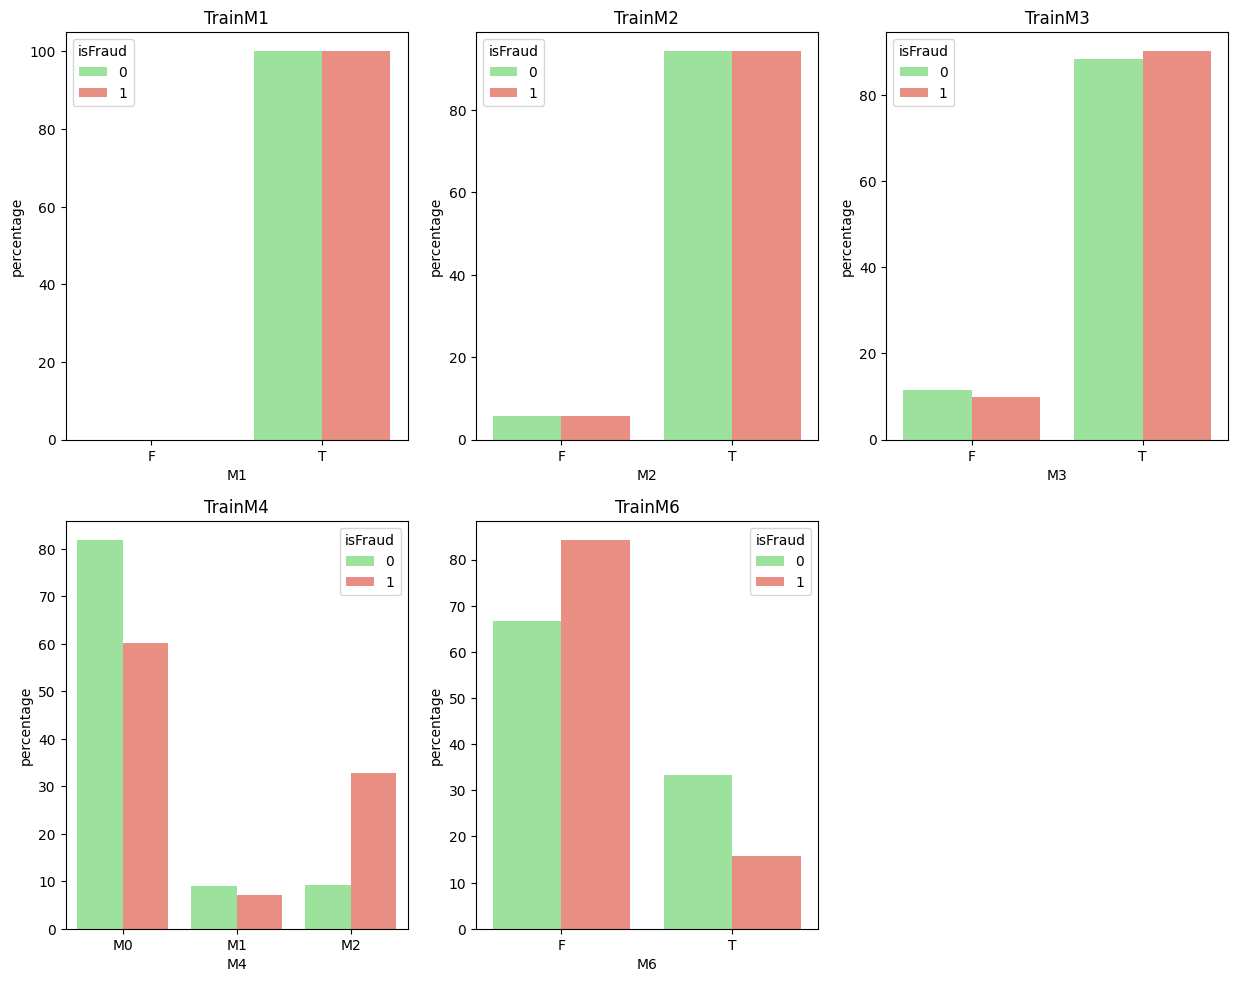

In [22]:
plt.figure(figsize=(15,18))
plt.subplot(3,3,1)
train_m1 = (train.groupby(['isFraud'])['M1']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('M1'))
sns.barplot(x="M1", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_m1)
plt.title('TrainM1')
plt.subplot(3,3,2)
train_m2 = (train.groupby(['isFraud'])['M2']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('M2'))
sns.barplot(x="M2", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_m2)
plt.title('TrainM2')
plt.subplot(3,3,3)
train_m3 = (train.groupby(['isFraud'])['M3']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('M3'))
sns.barplot(x="M3", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_m3)
plt.title('TrainM3')
plt.subplot(3,3,4)
train_m4 = (train.groupby(['isFraud'])['M4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('M4'))
sns.barplot(x="M4", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_m4)
plt.title('TrainM4')
plt.subplot(3,3,5)
train_m6 = (train.groupby(['isFraud'])['M6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('M6'))
sns.barplot(x="M6", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_m6)
plt.title('TrainM6')

In [23]:
train["M4"].unique()

array(['M0', 'M2', 'M1'], dtype=object)

In [24]:
m_cols = [c for c in train if c[0] == 'M']
train[m_cols].head()

,M1,M2,M3,M4,M6
0,T,T,T,M0,F
1,T,T,T,M0,F
2,T,T,T,M0,T
3,T,T,T,M0,F
4,T,T,T,M0,F


In [25]:
m_col = train[['M1','M2','M3','M4','M6']]

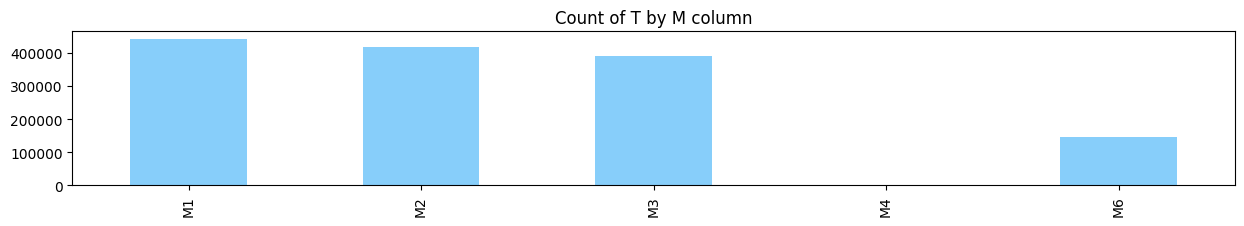

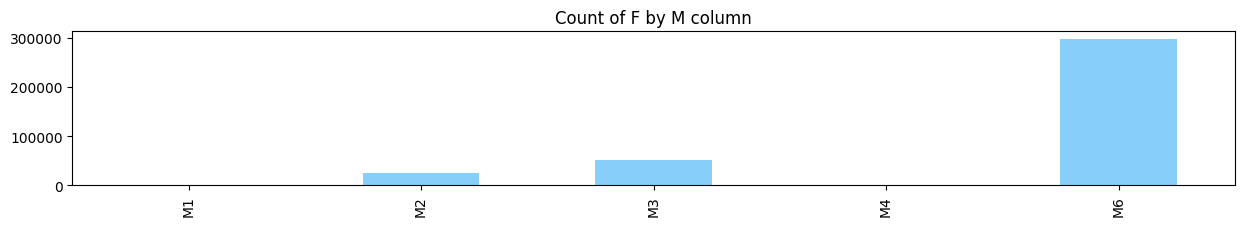

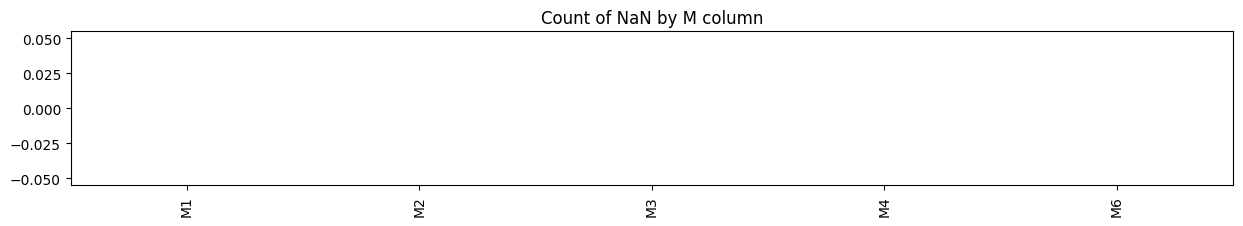

In [26]:
(train[m_cols] == 'T').sum().plot(kind='bar', color='#87CEFA', title='Count of T by M column', figsize=(15, 2))
plt.show()
(train[m_cols] == 'F').sum().plot(kind='bar', color='#87CEFA', title='Count of F by M column',figsize=(15, 2))
plt.show()
(train[m_cols].isna()).sum().plot(kind='bar', color='#87CEFA', title='Count of NaN by M column',figsize=(15, 2))
plt.show()

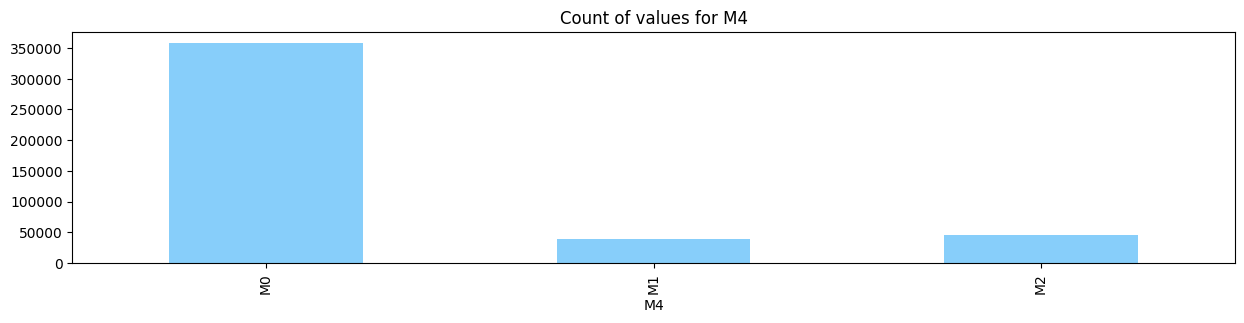

In [27]:
train.groupby('M4')['TransactionID'].count().plot(kind='bar',
                                                  color='#87CEFA',
                                                  title='Count of values for M4',
                                                  figsize=(15, 3))
plt.show()

In [28]:
C_cols = [c for c in train if c[0] == 'C']
train[C_cols].head()


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0,2.0
1,2.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,14.0,2.0
2,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,14.0,2.0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,84.0,87.0,0.0,0.0,142.0,69.0,0.0,0.0,48.0,0.0,54.0,0.0,483.0,74.0


In [29]:
cor_c = train[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]

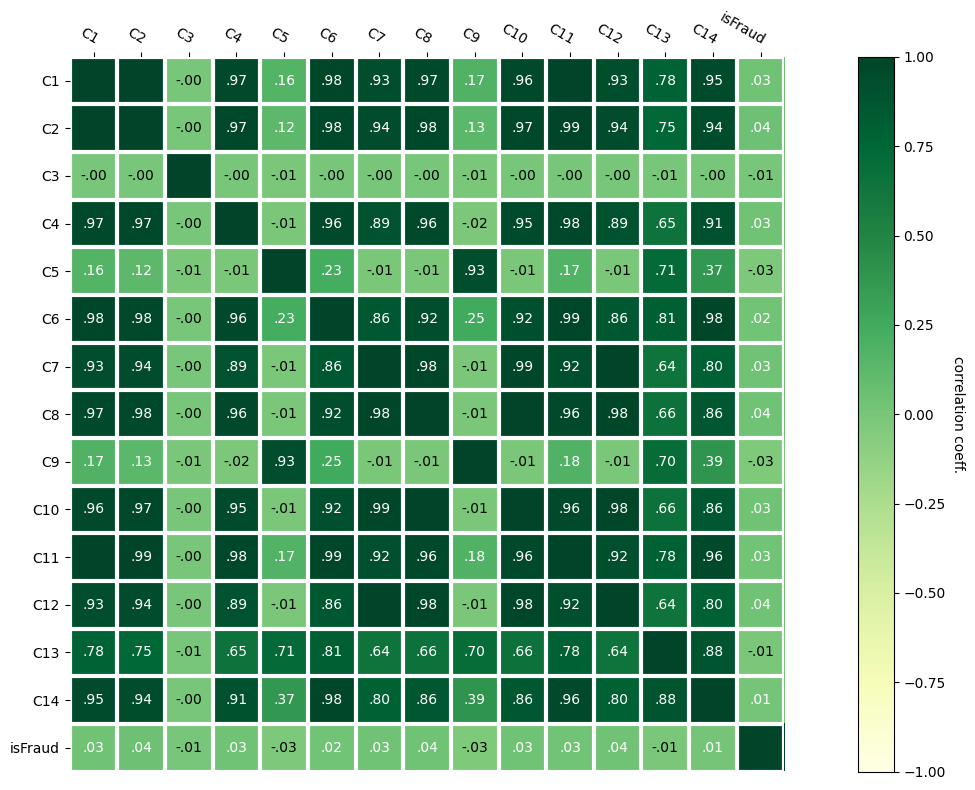

In [30]:
corr_matrix = cor_c.corr()
plt.figure(figsize=(15, 8))

im, _ = heatmap(corr_matrix, cor_c, cor_c, 
                cmap="YlGn", vmin=-1, vmax=1,
                cbarlabel="correlation coeff.")


def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=10)


plt.tight_layout()
plt.show()




In [31]:
d_cols = [c for c in train if c[0] == 'D']
train[d_cols].head()

,D1,D2,D3,D4,D10,D11,D15
0,14.0,14.0,9.0,370.0,14.0,351.0,375.0
1,136.0,136.0,8.0,136.0,136.0,43.0,136.0
2,193.0,193.0,0.0,495.0,495.0,495.0,495.0
3,0.0,97.0,8.0,0.0,0.0,43.0,0.0
4,35.0,35.0,1.0,566.0,76.0,559.0,559.0


Text(0.5, 1.0, 'TrainD1')

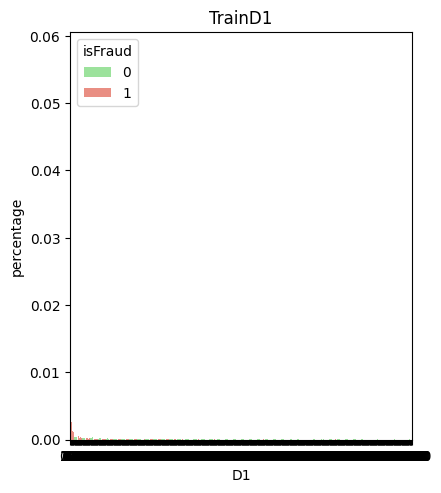

In [32]:
plt.figure(figsize=(15,18))
plt.subplot(3,3,1)
train_d1 = (train.groupby(['isFraud'])['D1']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(.100)
                     .reset_index()
                     .sort_values('D1'))
sns.barplot(x="D1", y="percentage", hue="isFraud", palette=['#90EE90', '#FA8072'], data=train_d1)
plt.title('TrainD1')



In [33]:
def describe(datatrain,datatest,feature):
    d = pd.DataFrame(columns=[feature,'Train','TrainFraud','TrainLegit','Test'])
    d[feature] = ['count','mean','std','min','25%','50%','75%','max','unique','NaN','NaNshare']
    for i in range(0,8):
        d['Train'].iloc[i] = datatrain[feature].describe().iloc[i]
        d['TrainFraud'].iloc[i]=datatrain[datatrain['isFraud']==1][feature].describe().iloc[i]
        d['TrainLegit'].iloc[i]=datatrain[datatrain['isFraud']==0][feature].describe().iloc[i]
        d['Test'].iloc[i]=datatest[feature].describe().iloc[i]
    d['Train'].iloc[8] = len(datatrain[feature].unique())
    d['TrainFraud'].iloc[8]=len(datatrain[datatrain['isFraud']==1][feature].unique())
    d['TrainLegit'].iloc[8]=len(datatrain[datatrain['isFraud']==0][feature].unique())
    d['Test'].iloc[8]=len(datatest[feature].unique())
    d['Train'].iloc[9] = datatrain[feature].isnull().sum()
    d['TrainFraud'].iloc[9] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()
    d['TrainLegit'].iloc[9] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()
    d['Test'].iloc[9]=datatest[feature].isnull().sum()
    d['Train'].iloc[10] = datatrain[feature].isnull().sum()/len(datatrain)
    d['TrainFraud'].iloc[10] = datatrain[datatrain['isFraud']==1][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==1])
    d['TrainLegit'].iloc[10] = datatrain[datatrain['isFraud']==0][feature].isnull().sum()/len(datatrain[datatrain['isFraud']==0])
    d['Test'].iloc[10]=datatest[feature].isnull().sum()/len(datatest)
    return d

In [34]:
transactionAmtDescribe = describe(train,test,'TransactionAmt')

In [35]:
transactionAmtDescribe

,TransactionAmt,Train,TrainFraud,TrainLegit,Test
0,count,442905.0,15497.0,427408.0,147635.0
1,mean,135.27369,149.039159,134.77458,134.287637
2,std,232.955213,232.199546,232.967557,256.885483
3,min,0.251,0.292,0.251,0.292
4,25%,43.744,35.412,44.0,42.95
5,50%,68.95,75.0,68.5,68.5
6,75%,125.0,161.0,121.0,120.948
7,max,6085.23,5191.0,6085.23,31937.391
8,unique,17988,2260,17668,9646
9,NaN,0,0,0,0


In [36]:
l=[99.9,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99]
for i in l:
    print('train',np.percentile(train['TransactionAmt'],i))
    print('test',np.percentile(test['TransactionAmt'],i))

train 2791.051840000042
test 2714.547640000277
train 2873.473712000037
test 2782.277972000012
train 2924.927024000026
test 2868.2086560000066
train 2983.95
test 2935.4726119999755
train 3071.472895999967
test 2964.3905799999934
train 3153.3960400000024
test 3055.7963400001904
train 3163.95
test 3162.702367999936
train 3352.9679200001665
test 3339.69172200001
train 3822.95
test 3663.480512000299
train 4222.95
test 4205.086439999409


In [37]:
train['LogTransactionAmt'] = np.log(train['TransactionAmt'])
test['LogTransactionAmt'] = np.log(test['TransactionAmt'])

C:\Users\saura\AppData\Local\Temp\ipykernel_8268\451242514.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['LogTransactionAmt'] = np.log(test['TransactionAmt'])


C:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

<AxesSubplot:xlabel='LogTransactionAmt', ylabel='Density'>

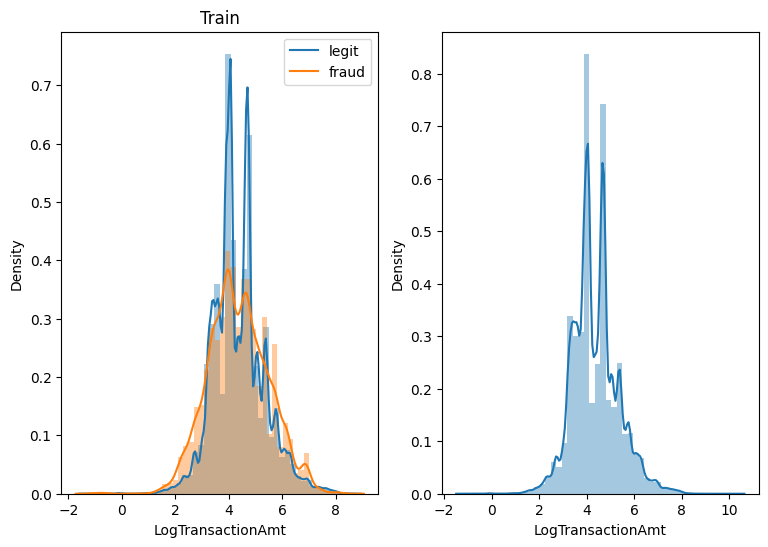

In [38]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
sns.distplot(train[train['isFraud']==0]['LogTransactionAmt'])
sns.distplot(train[train['isFraud']==1]['LogTransactionAmt'])
plt.legend(['legit','fraud'])
plt.title('Train')
plt.subplot(1,2,2)
sns.distplot(test['LogTransactionAmt'])

Text(0.5, 1.0, 'Test')

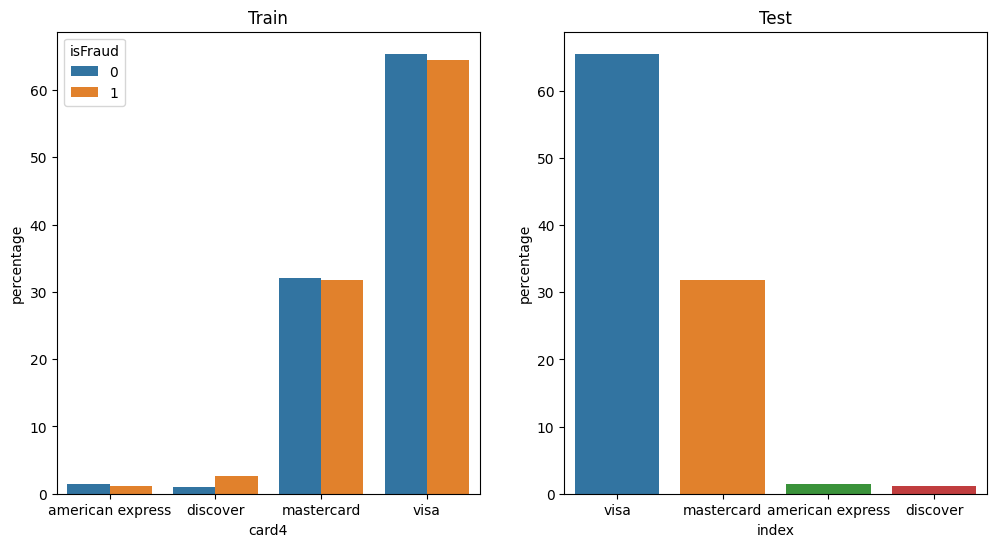

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)
plt.title('Train')
plt.subplot(1,2,2)
test_card4 =test[~test['card4'].isnull()]['card4'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card4)
plt.title('Test')

Text(0.5, 1.0, 'Test')

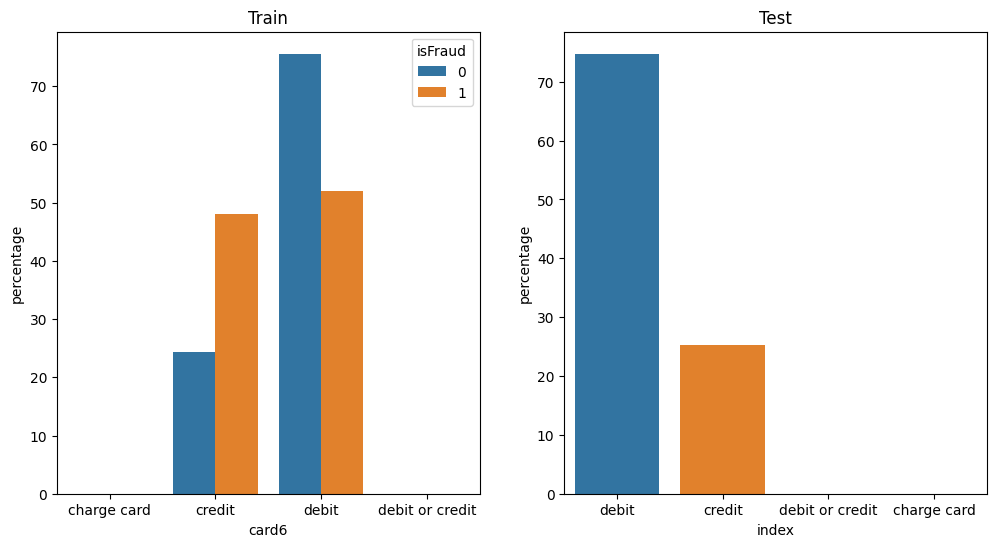

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card6)
plt.title('Test')


Text(0.5, 1.0, 'Test')

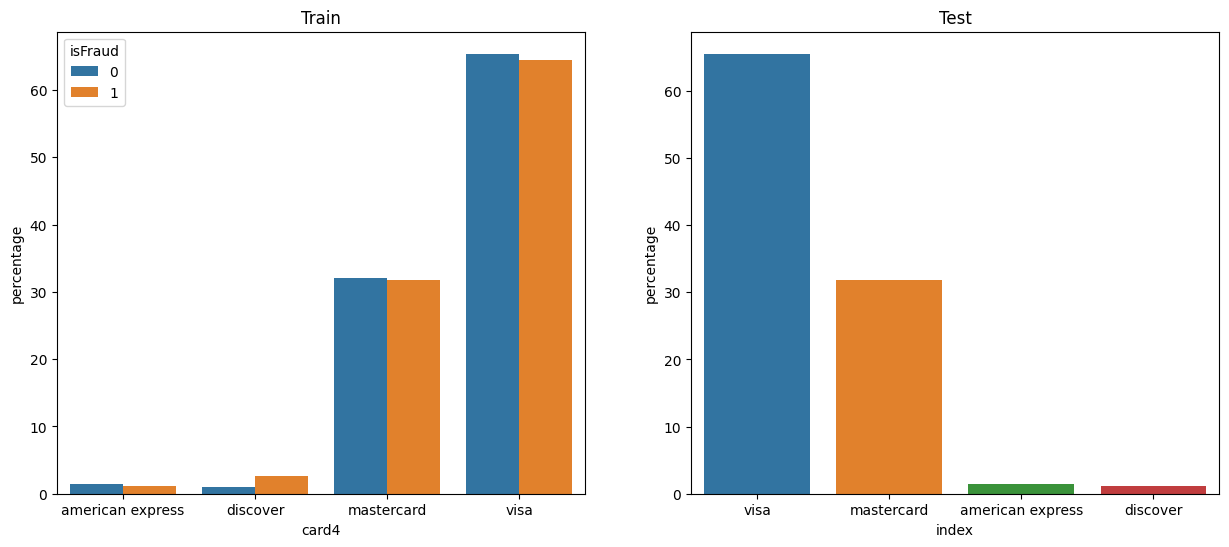

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train_card4 = (train[~train['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)
plt.title('Train')
plt.subplot(1,2,2)
test_card4 =test[~test['card4'].isnull()]['card4'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card4)
plt.title('Test')

Text(0.5, 1.0, 'Test')

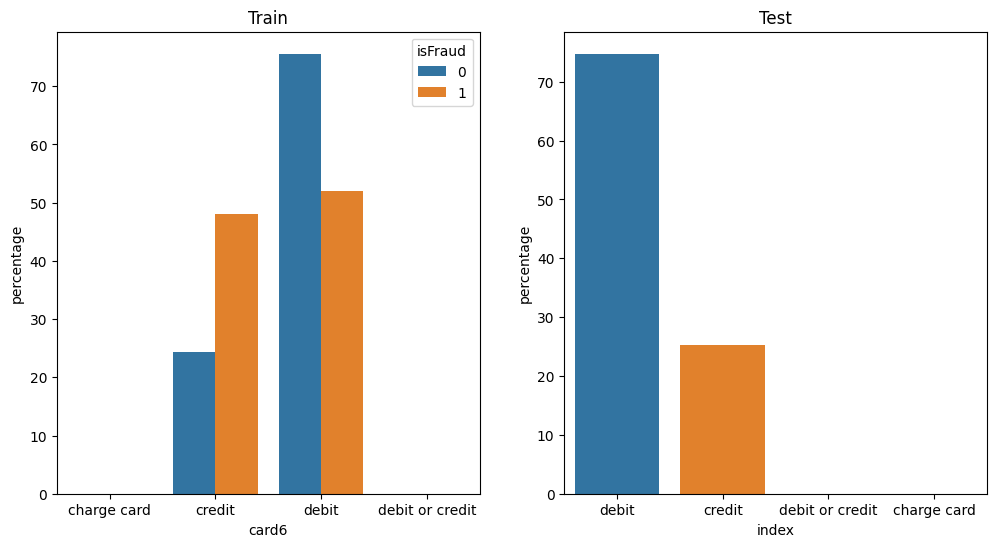

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
train_card6 = (train[~train['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)
plt.title('Train')
plt.subplot(1,2,2)
test_card6 =test[~test['card6'].isnull()]['card6'].value_counts(normalize=True).mul(100).rename('percentage')\
.reset_index()
sns.barplot(x="index", y="percentage", data=test_card6)
plt.title('Test')

In [43]:
# train['P_emaildomain'].value_counts()[:10]

In [44]:
# def returnfirst(email):
#     return email.split(".")[0]

In [45]:
# train['first'] = train[~train['P_emaildomain'].isnull()]['P_emaildomain'].apply(returnfirst)

In [46]:
# test['first'] = test[~test['P_emaildomain'].isnull()]['P_emaildomain'].apply(returnfirst)

In [47]:
# train_email = (train.groupby(['isFraud'])['first']
#                      .value_counts(normalize=True)
#                      .rename('percentage')
#                      .mul(100)
#                      .reset_index()
#                      .sort_values('first'))

In [48]:
# plt.figure(figsize=(22,10))
# sns.barplot(x="first", y="percentage", hue="isFraud", data=train_email)
# plt.xticks(rotation=90)

In [49]:
D_cols = [c for c in train if c[0] == 'D']
train[D_cols].head()

,D1,D2,D3,D4,D10,D11,D15
0,14.0,14.0,9.0,370.0,14.0,351.0,375.0
1,136.0,136.0,8.0,136.0,136.0,43.0,136.0
2,193.0,193.0,0.0,495.0,495.0,495.0,495.0
3,0.0,97.0,8.0,0.0,0.0,43.0,0.0
4,35.0,35.0,1.0,566.0,76.0,559.0,559.0


In [50]:
D_c = train[['D1','D2','D3','D4','D10','D11','D15','isFraud']];
f = D_c.corr()

Text(0.5, 1.0, 'D train')

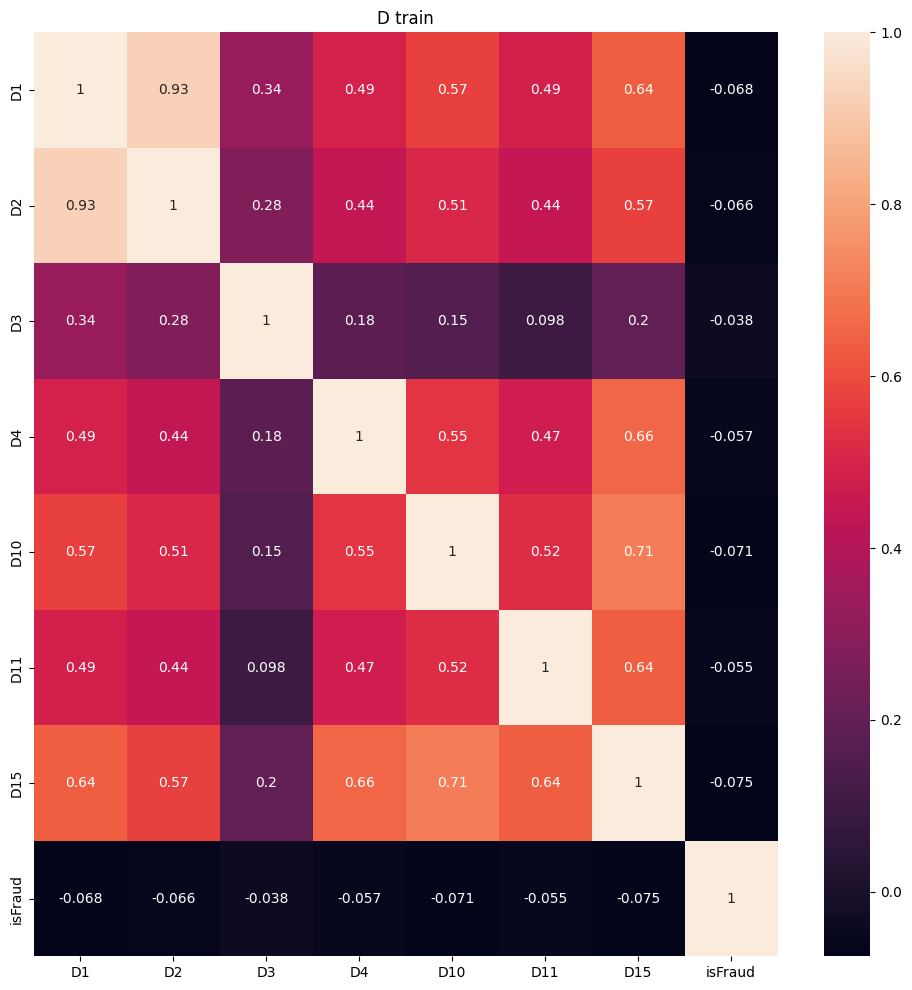

In [51]:
plt.figure(1,figsize=(12,12))
sns.heatmap(f,annot=True)
plt.title('D train')

In [52]:
train["M4"].unique()

array(['M0', 'M2', 'M1'], dtype=object)

In [53]:
train["P_emaildomain"].unique()

array(['gmail.com', 'centurylink.net', 'yahoo.com', 'anonymous.com',
       'mac.com', 'comcast.net', 'optonline.net', 'bellsouth.net',
       'hotmail.com', 'aol.com', 'me.com', 'msn.com', 'earthlink.net',
       'att.net', 'cableone.net', 'sbcglobal.net', 'outlook.es',
       'suddenlink.net', 'icloud.com', 'twc.com', 'gmx.de', 'ymail.com',
       'verizon.net', 'cox.net', 'yahoo.es', 'aim.com', 'windstream.net',
       'hotmail.es', 'rocketmail.com', 'yahoo.com.mx', 'live.com',
       'juno.com', 'sc.rr.com', 'outlook.com', 'live.com.mx', 'gmail',
       'charter.net', 'mail.com', 'netzero.com', 'web.de',
       'prodigy.net.mx', 'q.com', 'frontier.com', 'ptd.net',
       'netzero.net', 'hotmail.fr', 'roadrunner.com', 'embarqmail.com',
       'yahoo.de', 'yahoo.fr', 'hotmail.co.uk', 'protonmail.com',
       'frontiernet.net', 'cfl.rr.com', 'yahoo.co.uk', 'yahoo.co.jp',
       'live.fr', 'hotmail.de', 'servicios-ta.com'], dtype=object)

In [54]:
colsToHotEncode=["ProductCD","card4","card6","M4"]

In [55]:
train=pd.get_dummies(train,columns=colsToHotEncode)

In [56]:
test=pd.get_dummies(test,columns=colsToHotEncode)

In [57]:
train["M1"].replace(['T', 'F'], [1, 0], inplace=True)
train["M2"].replace(['T', 'F'], [1, 0], inplace=True)
train["M3"].replace(['T', 'F'], [1, 0], inplace=True)
train["M6"].replace(['T', 'F'], [1, 0], inplace=True)

In [58]:
test["M1"].replace(['T', 'F'], [1, 0], inplace=True)
test["M2"].replace(['T', 'F'], [1, 0], inplace=True)
test["M3"].replace(['T', 'F'], [1, 0], inplace=True)
test["M6"].replace(['T', 'F'], [1, 0], inplace=True)

In [59]:
frq=train.groupby("P_emaildomain").size()
frq
frqtest=test.groupby("P_emaildomain").size()
frqtest

P_emaildomain
aim.com                63
anonymous.com        9296
aol.com              7032
att.net               989
bellsouth.net         469
cableone.net           43
centurylink.net        46
cfl.rr.com             40
charter.net           201
comcast.net          2057
cox.net               334
earthlink.net         125
embarqmail.com         53
frontier.com           67
frontiernet.net        54
gmail                 132
gmail.com           80691
gmx.de                 40
hotmail.co.uk          29
hotmail.com         11341
hotmail.de              9
hotmail.es             74
hotmail.fr             83
icloud.com           1548
juno.com               76
live.com              740
live.com.mx           184
live.fr                19
mac.com                96
mail.com              134
me.com                392
msn.com              1020
netzero.com            55
netzero.net            64
optonline.net         262
outlook.com          1329
outlook.es            105
prodigy.net.mx         4

In [60]:
frq_dist=frq/len(train)
frq_dist
frq_dist_test=frqtest/len(test)
frq_dist_test

P_emaildomain
aim.com             0.000427
anonymous.com       0.062966
aol.com             0.047631
att.net             0.006699
bellsouth.net       0.003177
cableone.net        0.000291
centurylink.net     0.000312
cfl.rr.com          0.000271
charter.net         0.001361
comcast.net         0.013933
cox.net             0.002262
earthlink.net       0.000847
embarqmail.com      0.000359
frontier.com        0.000454
frontiernet.net     0.000366
gmail               0.000894
gmail.com           0.546557
gmx.de              0.000271
hotmail.co.uk       0.000196
hotmail.com         0.076818
hotmail.de          0.000061
hotmail.es          0.000501
hotmail.fr          0.000562
icloud.com          0.010485
juno.com            0.000515
live.com            0.005012
live.com.mx         0.001246
live.fr             0.000129
mac.com             0.000650
mail.com            0.000908
me.com              0.002655
msn.com             0.006909
netzero.com         0.000373
netzero.net         0.000434


In [61]:
train["P_emailDomainFreq"] = train.P_emaildomain.map(frq_dist)
test["P_emailDomainFreq"] = test.P_emaildomain.map(frq_dist_test)

In [62]:
train.drop("P_emaildomain",axis=1,inplace=True)
test.drop("P_emaildomain",axis=1,inplace=True)

In [63]:
#for removing columns with only one unique value if any
for col in train.columns:
    if len(train[col].unique()) == 1:
        train.drop(col,inplace=True,axis=1)
for col in test.columns:
    if len(test[col].unique()) == 1:
        test.drop(col,inplace=True,axis=1)

In [64]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [65]:
for i in num_features:
    num_var_outlier_remover = OutlierRemoval(train[i].quantile(0.25), train[i].quantile(0.75))
    train[i] = train[i].apply(num_var_outlier_remover.removeOutlier)
    num_var_outlier_remover_test = OutlierRemoval(test[i].quantile(0.25), test[i].quantile(0.75))
    test[i] = test[i].apply(num_var_outlier_remover_test.removeOutlier)    

In [66]:
train.describe() #removed outliers

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M6,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,LogTransactionAmt,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2,P_emailDomainFreq
count,4.429050e+05,442905.000000,4.429050e+05,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.000000,442905.0,442905.000000,442905.0,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.0,442905.0,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.0,442905.0,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.0,442905.000000,442905.000000,442905.0,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.0,442905.000000,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.0,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000,442905.000000
mean,3.282059e+06,0.034989,7.366857e+06,98.367527,9901.266082,361.913564,153.180048,199.468304,291.579646,86.821865,2.212743,2.226227,0.0,0.0,0.582056,1.515125,0.0,0.0,1.361003,0.0,1.582448,0.0,8.057544,1.655539,74.539505,97.944752,8.570420,82.699118,93.534106,45.633601,146.642007,0.999959,0.942538,0.885605,0.327420,1.0

In [67]:
test.describe() #removed outliers

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M6,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,LogTransactionAmt,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,M4_M0,M4_M1,M4_M2,P_emailDomainFreq
count,1.476350e+05,1.476350e+05,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.000000,147635.0,147635.000000,147635.0,147635.000000,147635.000000,147635.00000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.00000,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.0,147635.0,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.0,147635.0,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.0,147635.000000,147635.000000,147635.0,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.0,147635.000000,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.0,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000,147635.000000
mean,3.282900e+06,7.388674e+06,96.999906,9891.140387,361.966851,153.205690,199.481532,291.875172,86.825658,2.211163,2.226403,0.0,0.0,0.580855,1.512670,0.0,0.0,1.357977,0.0,1.581705,0.0,8.063982,1.655139,74.57250,97.695038,8.554089,82.256768,94.080652,46.425204,146.496203,0.999953,0.942277,0.884560,0.327212,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0

In [68]:
# train.corr().isFraud

In [69]:
ytrain=train["isFraud"]
xtrain=train
xtrain.drop("isFraud",inplace=True,axis=1)

In [70]:

xtrain=xtrain.drop(['TransactionID'],axis=1,inplace=False)


In [71]:
test=test.drop(['TransactionID'],axis=1,inplace=False)

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

In [73]:
xtrain.to_csv("xtrain.csv",index=False)

In [74]:
ytrain.to_csv("ytrain.csv",index=False)

In [75]:
test.to_csv("xtest.csv",index=False)

In [76]:
# #Applying PCA

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(xtrain)


In [77]:
# #Finding parameters(components) for PCA

# candidate_components=np.arange(1,100,5)
# variances=[]
# for candidate in candidate_components:
#     pca = PCA(n_components=candidate)
#     principalComponents = pca.fit_transform(X_scaled)
#     variances.append(np.sum(pca.explained_variance_ratio_))
    
# plt.figure(figsize = (5, 5))
# plt.plot(candidate_components,variances)
# plt.xlabel('Number of components')
# plt.ylabel('Variance')
# plt.title('There will usually be an elbow in the curve, where the explained variance stops growing fast',fontsize=7);

In [78]:
# pca = PCA(n_components=24)
# principalComponents = pca.fit_transform(X_scaled)
# print(pca.explained_variance_ratio_)

In [79]:
# s = x.select_dtypes(np.number).lt(0).any()\
#       .reindex(x.columns, fill_value=False)\
# #       .rename_axis("col").reset_index(name='isnegative')